In [206]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from statannotations.Annotator import Annotator
import scipy.stats as ss
import statsmodels.api as sa
import scikit_posthocs as sp
from statsmodels.formula.api import ols
%matplotlib inline

In [207]:
coloc_region = pd.read_csv('./EuHetChrom_Rep1/220221_exp4.38_CoLoc_UpdatedNuclei.csv')

In [208]:
#Filter nuclei based on shape and number of red/green objects, by percentiles
coloc_region_filtered = coloc_region.loc[
    (coloc_region['Children_RedObjects_Count'] > coloc_region.quantile(q = 0.2, axis = 0)['Children_RedObjects_Count']) &
    (coloc_region['Children_RedObjects_Count'] < coloc_region.quantile(q = 0.9, axis = 0)['Children_RedObjects_Count']) &
    (coloc_region['Children_GreenObjects_Count'] > coloc_region.quantile(q = 0.1, axis = 0)['Children_GreenObjects_Count']) &
    (coloc_region['Children_GreenObjects_Count'] < coloc_region.quantile(q = 0.9, axis = 0)['Children_GreenObjects_Count']) &
    (coloc_region['AreaShape_Compactness'] < coloc_region.quantile(q = 0.9, axis = 0)['AreaShape_Compactness']) &
    (coloc_region['AreaShape_Solidity'] > coloc_region.quantile(q = 0.1, axis = 0)['AreaShape_Solidity'])]

/Users/hildebre1/miniconda/envs/image-analysis/lib/python3.9/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


In [209]:
#keep the largest area of each object
#https://stackoverflow.com/questions/15705630/get-the-rows-which-have-the-max-value-in-groups-using-groupby

coloc_region_filtered_max_area = coloc_region_filtered.loc[coloc_region_filtered.groupby(
    ['Metadata_FullImageName', 'Metadata_Series', 'TrackObjects_Label_100'])["AreaShape_Area"].idxmax()]

In [210]:
coloc_region_filtered_max_area

,ImageNumber,ObjectNumber,Metadata_C,Metadata_ChannelName,Metadata_ColorFormat,Metadata_Date,Metadata_ExpNum,Metadata_FileLocation,Metadata_Frame,Metadata_FullImageName,...,TrackObjects_DistanceTraveled_100,TrackObjects_FinalAge_100,TrackObjects_IntegratedDistance_100,TrackObjects_Label_100,TrackObjects_Lifetime_100,TrackObjects_Linearity_100,TrackObjects_ParentImageNumber_100,TrackObjects_ParentObjectNumber_100,TrackObjects_TrajectoryX_100,TrackObjects_TrajectoryY_100
0,3,1,NaN,NaN,monochrome,200903,4.38,file:/Users/hildebre1/Dropbox%20%28UMass%20Med...,NaN,200903_exp4.38_slide10_newsettings_001,...,0.000000,NaN,0.000000,1,1.0,NaN,0.0,0,0.000000,0.000000
6,5,2,NaN,NaN,monochrome,200903,4.38,file:/Users/hildebre1/Dropbox%20%28UMass%20Med...,NaN,200903_exp4.38_slide10_newsettings_001,...,8.487983,NaN,10.509894,3,3.0,0.946930,4.0,2,5.190485,-6.716005
19,17,1,NaN,NaN,monochrome,200903,4.38,file:/Users/hildebre1/Dropbox%20%28UMass%20Med...,NaN,200903_exp4.38_slide10_newsettings_002,...,2.697086,NaN,7.718389,1,3.0,0.792977,16.0,1,-2.612803,0.668981
35,30,2,NaN,NaN,monochrome,200903,4.38,file:/Users/hildebre1/Dropbox%20%28UMass%20Med...,NaN,200903_exp4.38_slide10_newsettings_003,...,6.020774,NaN,26.090095,1,5.0,0.522747,29.0,2,1.628186,5.796441
34,30,1,NaN,NaN,monochrome,200903,4.38,file:/Users/hildebre1/Dropbox%20%28UMass%20Med...,NaN,200903_exp4.38_slide10_newsettings_003,...,6.487599,NaN,24.783539,2,5.0,0.315875,29.0,1,6.312946,1.495208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381,931,1,NaN,NaN,monochrome,200903,4.38,file:/Users/hildebre1/Dropbox%20%28UMass%20Med...,NaN,200903_exp4.38_slide6_newsettings_009,...,5.107399,NaN,26.460054,1,5.0,0.965338,930.0,1,3.703853,3.516674
1382,931,2,NaN,NaN,monochrome,200903,4.38,file:/Users/hildebre1/Dropbox%20%28UMass%20Med...,NaN,200903_exp4.38_slide6_newsettings_009,...,4.463047,NaN,45.190584,3,4.0,0.787145,930.0,2,-2.756759,3.509854
1399,943,1,NaN,NaN,monochrome,200903,4.38,file:/Users/hildebre1/Dropbox%20%28UMass%20Med...,NaN,200903_exp4.38_slide6_newsettings_010,...,8.076929,NaN,21.239457,1,4.0,0.810755,942.0,1,6.845711,4.286375
1397,942,2,NaN,NaN,monochrome,200903,4.38,file:/Users/hildebre1/Dropbox%20%28UMass%20Med...,NaN,200903_exp4.38_slide6_newsettings_010,...,4.789488,NaN,12.080408,2,3.0,0.958456,941.0,2,-0.445544,-4.768719


In [211]:
#list(coloc_region_filtered_max_area.columns)

In [212]:
coloc_region_filtered_max_area.loc[coloc_region_filtered_max_area['Metadata_SlideNum'] == 5,'Sample'] = 't4 DMSO'
coloc_region_filtered_max_area.loc[coloc_region_filtered_max_area['Metadata_SlideNum'] == 6,'Sample'] = 't4 DMSO'
coloc_region_filtered_max_area.loc[coloc_region_filtered_max_area['Metadata_SlideNum'] == 10,'Sample'] = 't4 ICRF-193'
coloc_region_filtered_max_area.loc[coloc_region_filtered_max_area['Metadata_SlideNum'] == 11,'Sample'] = 't4 ICRF-193'
coloc_region_filtered_max_area.loc[coloc_region_filtered_max_area['Metadata_SlideNum'] == 13,'Sample'] = 't8 DMSO'
coloc_region_filtered_max_area.loc[coloc_region_filtered_max_area['Metadata_SlideNum'] == 14,'Sample'] = 't8 DMSO'
coloc_region_filtered_max_area.loc[coloc_region_filtered_max_area['Metadata_SlideNum'] == 16,'Sample'] = 't8 ICRF-193'
coloc_region_filtered_max_area.loc[coloc_region_filtered_max_area['Metadata_SlideNum'] == 17,'Sample'] = 't8 ICRF-193'

In [213]:
coloc_region_filtered_max_area = coloc_region_filtered_max_area[coloc_region_filtered_max_area['Sample'].isin(['t4 DMSO', 't4 ICRF-193', 't8 DMSO', 't8 ICRF-193'])].reset_index(drop = True)

In [214]:
coloc_region_filtered_max_area['Replicate'] = 'R1'

In [215]:
coloc_region_filtered_max_area['ColocAreaFraction'] = coloc_region_filtered_max_area['Math_CArea_ByNuclei']/coloc_region_filtered_max_area['AreaShape_Area']

In [216]:
coloc_region_filtered_max_area['RedColocCountFraction'] = coloc_region_filtered_max_area['Children_CORed_Count']/coloc_region_filtered_max_area['Children_RedObjects_Count']

In [217]:
coloc_region_filtered_max_area.to_csv('./EuHetChrom_Rep1/220221_EuHetOverlap_RadialDist_exp4.38_data_R1.csv', index = False)

In [218]:
coloc_region_filtered_max_area = coloc_region_filtered_max_area[[
    'Sample', 
    'Metadata_FullImageName', 
    'Metadata_Z', 
    'Location_Center_X', 
    'Location_Center_Y',
    'Math_RedColocAreaFraction_ByNuclei',
    'Math_RedColocObjectAreaFraction_ByNuclei',
    'Math_CArea_ByNuclei',
    'AreaShape_Area',
    'ColocAreaFraction',
    'Math_RedObjectsWithGreenChildrenFraction',
]]

In [219]:
#Find nuclei with overlap near median for each sample to show as representative examples
representative_images_means = coloc_region_filtered_max_area.groupby('Sample').agg('mean')

In [225]:
coloc_region_filtered_max_area.loc[coloc_region_filtered_max_area['Sample'] == 't8 ICRF-193'][['Sample', 'Metadata_FullImageName', 'Metadata_Z', 'Location_Center_X', 'Location_Center_Y', 'Math_RedObjectsWithGreenChildrenFraction']]

,Sample,Metadata_FullImageName,Metadata_Z,Location_Center_X,Location_Center_Y,Math_RedObjectsWithGreenChildrenFraction
85,t8 ICRF-193,200903_exp4.38_slide16_newsettings_001,7,252.923645,377.054288,0.163265
86,t8 ICRF-193,200903_exp4.38_slide16_newsettings_001,9,254.041419,121.286912,0.137255
87,t8 ICRF-193,200903_exp4.38_slide16_newsettings_002,6,151.209341,290.214832,0.112676
88,t8 ICRF-193,200903_exp4.38_slide16_newsettings_002,4,390.306713,391.251842,0.151515
89,t8 ICRF-193,200903_exp4.38_slide16_newsettings_002,7,143.094254,104.235984,0.214286
90,t8 ICRF-193,200903_exp4.38_slide16_newsettings_003,9,396.597651,143.851846,0.180328
91,t8 ICRF-193,200903_exp4.38_slide16_newsettings_003,10,136.885042,361.037790,0.172414
92,t8 ICRF-193,200903_exp4.38_slide16_newsettings_003,5,400.707607,123.311443,0.285714
93,t8 ICRF-193,200903_exp4.38_slide16_newsettings_004,9,254.418905,159.830115,0.171429
94,t8 ICRF-193,200903_exp4.38_slide16_newsettings_004,5,320.535389,414.363124,0.128205


In [175]:
coloc_region = pd.read_csv('./EuHetChrom_Rep2/220221_exp4.43_CoLoc_UpdatedNuclei.csv')

In [176]:
#Filter nuclei based on shape and number of red/green objects, by percentiles
coloc_region_filtered = coloc_region.loc[(coloc_region['Children_RedObjects_Count'] > coloc_region.quantile(q = 0.2, axis = 0)['Children_RedObjects_Count']) &
                                                  (coloc_region['Children_RedObjects_Count'] < coloc_region.quantile(q = 0.9, axis = 0)['Children_RedObjects_Count']) &
                                                  (coloc_region['Children_GreenObjects_Count'] > coloc_region.quantile(q = 0.1, axis = 0)['Children_GreenObjects_Count']) &
                                                  (coloc_region['Children_GreenObjects_Count'] < coloc_region.quantile(q = 0.9, axis = 0)['Children_GreenObjects_Count']) &
                                                  (coloc_region['AreaShape_Compactness'] < coloc_region.quantile(q = 0.9, axis = 0)['AreaShape_Compactness']) &
                                                  (coloc_region['AreaShape_Solidity'] > coloc_region.quantile(q = 0.1, axis = 0)['AreaShape_Solidity'])]

/Users/hildebre1/miniconda/envs/image-analysis/lib/python3.9/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


In [177]:
#keep the largest area of each object
#https://stackoverflow.com/questions/15705630/get-the-rows-which-have-the-max-value-in-groups-using-groupby

coloc_region_filtered_max_area = coloc_region_filtered.loc[coloc_region_filtered.groupby(['Metadata_FullImageName', 'Metadata_Series', 'TrackObjects_Label_100'])["AreaShape_Area"].idxmax()]

In [178]:
#list(coloc_region_filtered_max_area.columns)

In [179]:
coloc_region_filtered_max_area.loc[coloc_region_filtered_max_area['Metadata_SlideNum'] == 9,'Sample'] = 't4 DMSO'
coloc_region_filtered_max_area.loc[coloc_region_filtered_max_area['Metadata_SlideNum'] == 12,'Sample'] = 't4 ICRF-193'
coloc_region_filtered_max_area.loc[coloc_region_filtered_max_area['Metadata_SlideNum'] == 15,'Sample'] = 't8 DMSO'
coloc_region_filtered_max_area.loc[coloc_region_filtered_max_area['Metadata_SlideNum'] == 18,'Sample'] = 't8 ICRF-193'

In [180]:
coloc_region_filtered_max_area = coloc_region_filtered_max_area[coloc_region_filtered_max_area['Sample'].isin(['t4 DMSO', 't4 ICRF-193', 't8 DMSO', 't8 ICRF-193'])].reset_index(drop = True)

In [181]:
coloc_region_filtered_max_area['Replicate'] = 'R2'

In [182]:
coloc_region_filtered_max_area['ColocAreaFraction'] = coloc_region_filtered_max_area['Math_CArea_ByNuclei']/coloc_region_filtered_max_area['AreaShape_Area']

In [183]:
coloc_region_filtered_max_area['RedColocCountFraction'] = coloc_region_filtered_max_area['Children_CORed_Count']/coloc_region_filtered_max_area['Children_RedObjects_Count']

In [184]:
coloc_region_filtered_max_area.to_csv('./EuHetChrom_Rep2/220221_EuHetOverlap_RadialDist_exp4.43_data_R2.csv', index = False)

In [185]:
rep1 = pd.read_csv('./EuHetChrom_Rep1/220221_EuHetOverlap_RadialDist_exp4.38_data_R1.csv')
rep2 = pd.read_csv('./EuHetChrom_Rep2/220221_EuHetOverlap_RadialDist_exp4.43_data_R2.csv')

In [186]:
rep1 = rep1[[
 'Sample',
 'Replicate',
 'Math_RedColocAreaFraction_ByNuclei',
 'Math_RedColocObjectAreaFraction_ByNuclei',
 'Math_CArea_ByNuclei',
 'AreaShape_Area',
 'ColocAreaFraction',
 'RedColocCountFraction',
 'Math_GreenObjectsWithRedChildrenFraction',
 'Math_RedObjectsWithGreenChildrenFraction',
 'RadialDistribution_MeanFrac_DNA_1of10',
 'RadialDistribution_MeanFrac_DNA_2of10',
 'RadialDistribution_MeanFrac_DNA_3of10',
 'RadialDistribution_MeanFrac_DNA_4of10',
 'RadialDistribution_MeanFrac_DNA_5of10',
 'RadialDistribution_MeanFrac_DNA_6of10',
 'RadialDistribution_MeanFrac_DNA_7of10',
 'RadialDistribution_MeanFrac_DNA_8of10',
 'RadialDistribution_MeanFrac_DNA_9of10',
 'RadialDistribution_MeanFrac_DNA_10of10',
 'RadialDistribution_MeanFrac_Green_1of10', 
 'RadialDistribution_MeanFrac_Green_2of10',
 'RadialDistribution_MeanFrac_Green_3of10',
 'RadialDistribution_MeanFrac_Green_4of10',
 'RadialDistribution_MeanFrac_Green_5of10',
 'RadialDistribution_MeanFrac_Green_6of10',
 'RadialDistribution_MeanFrac_Green_7of10',
 'RadialDistribution_MeanFrac_Green_8of10',
 'RadialDistribution_MeanFrac_Green_9of10',
 'RadialDistribution_MeanFrac_Green_10of10',
 'RadialDistribution_MeanFrac_Red_1of10',
 'RadialDistribution_MeanFrac_Red_2of10',
 'RadialDistribution_MeanFrac_Red_3of10',
 'RadialDistribution_MeanFrac_Red_4of10',
 'RadialDistribution_MeanFrac_Red_5of10',
 'RadialDistribution_MeanFrac_Red_6of10',
 'RadialDistribution_MeanFrac_Red_7of10',
 'RadialDistribution_MeanFrac_Red_8of10',
 'RadialDistribution_MeanFrac_Red_9of10',
 'RadialDistribution_MeanFrac_Red_10of10']]

In [187]:
rep2 = rep2[[
 'Sample',
 'Replicate',
 'Math_RedColocAreaFraction_ByNuclei',
 'Math_RedColocObjectAreaFraction_ByNuclei',
 'Math_CArea_ByNuclei',
 'AreaShape_Area',
 'ColocAreaFraction',
 'RedColocCountFraction',
 'Math_GreenObjectsWithRedChildrenFraction',
 'Math_RedObjectsWithGreenChildrenFraction',
 'RadialDistribution_MeanFrac_DNA_1of10',
 'RadialDistribution_MeanFrac_DNA_2of10',
 'RadialDistribution_MeanFrac_DNA_3of10',
 'RadialDistribution_MeanFrac_DNA_4of10',
 'RadialDistribution_MeanFrac_DNA_5of10',
 'RadialDistribution_MeanFrac_DNA_6of10',
 'RadialDistribution_MeanFrac_DNA_7of10',
 'RadialDistribution_MeanFrac_DNA_8of10',
 'RadialDistribution_MeanFrac_DNA_9of10',
 'RadialDistribution_MeanFrac_DNA_10of10',
 'RadialDistribution_MeanFrac_Green_1of10', 
 'RadialDistribution_MeanFrac_Green_2of10',
 'RadialDistribution_MeanFrac_Green_3of10',
 'RadialDistribution_MeanFrac_Green_4of10',
 'RadialDistribution_MeanFrac_Green_5of10',
 'RadialDistribution_MeanFrac_Green_6of10',
 'RadialDistribution_MeanFrac_Green_7of10',
 'RadialDistribution_MeanFrac_Green_8of10',
 'RadialDistribution_MeanFrac_Green_9of10',
 'RadialDistribution_MeanFrac_Green_10of10',
 'RadialDistribution_MeanFrac_Red_1of10',
 'RadialDistribution_MeanFrac_Red_2of10',
 'RadialDistribution_MeanFrac_Red_3of10',
 'RadialDistribution_MeanFrac_Red_4of10',
 'RadialDistribution_MeanFrac_Red_5of10',
 'RadialDistribution_MeanFrac_Red_6of10',
 'RadialDistribution_MeanFrac_Red_7of10',
 'RadialDistribution_MeanFrac_Red_8of10',
 'RadialDistribution_MeanFrac_Red_9of10',
 'RadialDistribution_MeanFrac_Red_10of10']]

In [188]:
combo = rep1.append(rep2, ignore_index = True)

In [189]:
combo

,Sample,Replicate,Math_RedColocAreaFraction_ByNuclei,Math_RedColocObjectAreaFraction_ByNuclei,Math_CArea_ByNuclei,AreaShape_Area,ColocAreaFraction,RedColocCountFraction,Math_GreenObjectsWithRedChildrenFraction,Math_RedObjectsWithGreenChildrenFraction,...,RadialDistribution_MeanFrac_Red_1of10,RadialDistribution_MeanFrac_Red_2of10,RadialDistribution_MeanFrac_Red_3of10,RadialDistribution_MeanFrac_Red_4of10,RadialDistribution_MeanFrac_Red_5of10,RadialDistribution_MeanFrac_Red_6of10,RadialDistribution_MeanFrac_Red_7of10,RadialDistribution_MeanFrac_Red_8of10,RadialDistribution_MeanFrac_Red_9of10,RadialDistribution_MeanFrac_Red_10of10
0,t4 ICRF-193,R1,0.130931,0.721880,298.0,9800,0.030408,0.555556,0.764706,0.361111,...,2.089451,2.116034,1.954764,1.758175,1.395278,1.316248,1.242792,0.905005,0.729827,0.560747
1,t4 ICRF-193,R1,0.131636,0.728727,543.0,14603,0.037184,0.696970,0.900000,0.136364,...,0.938690,1.004074,0.785270,0.830069,0.995405,0.953228,1.123377,1.206793,1.192432,0.720982
2,t4 ICRF-193,R1,0.143950,0.542748,527.0,13577,0.038816,0.508772,0.636364,0.122807,...,1.091182,0.959999,0.888525,0.995077,1.029923,1.109134,1.136217,1.062383,1.157465,0.697144
3,t4 ICRF-193,R1,0.092523,0.340187,396.0,14467,0.027373,0.347826,0.727273,0.115942,...,0.716324,0.928667,1.154667,1.199780,1.097706,1.065130,1.010567,1.117645,1.161367,0.637969
4,t4 ICRF-193,R1,0.118747,0.430753,451.0,13478,0.033462,0.370968,0.800000,0.225806,...,1.179214,1.115004,1.026119,0.920001,0.978654,1.107247,1.092968,1.258901,1.070090,0.670034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,t4 DMSO,R2,0.165397,0.671000,369.0,7004,0.052684,0.625000,0.777778,0.200000,...,1.179356,1.027266,0.883737,0.964957,1.121878,1.162279,1.175225,1.209397,1.001550,0.626096
349,t4 DMSO,R2,0.094220,0.541618,163.0,4859,0.033546,0.545455,0.500000,0.060606,...,0.650141,0.828976,0.951971,0.873776,0.814498,1.117343,1.245183,1.208576,1.040731,0.708782
350,t4 DMSO,R2,0.253977,0.707847,479.0,8320,0.057572,0.694444,0.461538,0.222222,...,0.666287,0.700447,0.765650,0.822076,0.987347,1.091857,1.017932,1.083882,1.090918,0.898486
351,t4 DMSO,R2,0.166576,0.590093,306.0,6536,0.046818,0.522727,0.600000,0.068182,...,0.490117,0.681806,0.796469,0.927416,1.088212,1.267821,1.228616,1.111793,1.043780,0.695353


In [190]:
combo.to_csv('./220221_RadialDist_exp4.38and4.43_data_R1R2.csv', index = False)

In [158]:
combo_greenMeanFrac = combo[['Sample', 'Replicate',  
                            'RadialDistribution_MeanFrac_Green_1of10', 
                            'RadialDistribution_MeanFrac_Green_2of10',
                            'RadialDistribution_MeanFrac_Green_3of10',
                            'RadialDistribution_MeanFrac_Green_4of10',
                            'RadialDistribution_MeanFrac_Green_5of10',
                            'RadialDistribution_MeanFrac_Green_6of10',
                            'RadialDistribution_MeanFrac_Green_7of10',
                            'RadialDistribution_MeanFrac_Green_8of10',
                            'RadialDistribution_MeanFrac_Green_9of10',
                            'RadialDistribution_MeanFrac_Green_10of10',]
].melt(id_vars = ['Sample', 'Replicate'])

In [144]:
#split out radial bin number from full variable field

In [145]:
combo_greenMeanFrac['Radial Bin'] = combo_greenMeanFrac['variable'].str.split('_').str[3].str.split('of').str[0]

In [146]:
combo_greenMeanFrac

,Sample,Replicate,variable,value,Radial Bin
0,t4 ICRF-193,R1,RadialDistribution_MeanFrac_Green_1of10,0.634361,1
1,t4 ICRF-193,R1,RadialDistribution_MeanFrac_Green_1of10,0.556412,1
2,t4 ICRF-193,R1,RadialDistribution_MeanFrac_Green_1of10,0.498118,1
3,t4 ICRF-193,R1,RadialDistribution_MeanFrac_Green_1of10,0.921005,1
4,t4 ICRF-193,R1,RadialDistribution_MeanFrac_Green_1of10,0.442476,1
...,...,...,...,...,...
3525,t4 DMSO,R2,RadialDistribution_MeanFrac_Green_10of10,1.139043,10
3526,t4 DMSO,R2,RadialDistribution_MeanFrac_Green_10of10,1.450357,10
3527,t4 DMSO,R2,RadialDistribution_MeanFrac_Green_10of10,1.263636,10
3528,t4 DMSO,R2,RadialDistribution_MeanFrac_Green_10of10,1.244165,10


In [147]:
combo_redMeanFrac = combo[['Sample', 'Replicate',  
                            'RadialDistribution_MeanFrac_Red_1of10', 
                            'RadialDistribution_MeanFrac_Red_2of10',
                            'RadialDistribution_MeanFrac_Red_3of10',
                            'RadialDistribution_MeanFrac_Red_4of10',
                            'RadialDistribution_MeanFrac_Red_5of10',
                            'RadialDistribution_MeanFrac_Red_6of10',
                            'RadialDistribution_MeanFrac_Red_7of10',
                            'RadialDistribution_MeanFrac_Red_8of10',
                            'RadialDistribution_MeanFrac_Red_9of10',
                            'RadialDistribution_MeanFrac_Red_10of10',]
].melt(id_vars = ['Sample', 'Replicate'])

In [148]:
#split out radial bin number from full variable field

In [149]:
combo_redMeanFrac['Radial Bin'] = combo_redMeanFrac['variable'].str.split('_').str[3].str.split('of').str[0]

In [150]:
combo_redMeanFrac

,Sample,Replicate,variable,value,Radial Bin
0,t4 ICRF-193,R1,RadialDistribution_MeanFrac_Red_1of10,2.089451,1
1,t4 ICRF-193,R1,RadialDistribution_MeanFrac_Red_1of10,0.938690,1
2,t4 ICRF-193,R1,RadialDistribution_MeanFrac_Red_1of10,1.091182,1
3,t4 ICRF-193,R1,RadialDistribution_MeanFrac_Red_1of10,0.716324,1
4,t4 ICRF-193,R1,RadialDistribution_MeanFrac_Red_1of10,1.179214,1
...,...,...,...,...,...
3525,t4 DMSO,R2,RadialDistribution_MeanFrac_Red_10of10,0.626096,10
3526,t4 DMSO,R2,RadialDistribution_MeanFrac_Red_10of10,0.708782,10
3527,t4 DMSO,R2,RadialDistribution_MeanFrac_Red_10of10,0.898486,10
3528,t4 DMSO,R2,RadialDistribution_MeanFrac_Red_10of10,0.695353,10


In [151]:
combo_redMeanFrac['log2FC Red/Green'] = np.log2(combo_redMeanFrac['value']) - np.log2(combo_greenMeanFrac['value'])

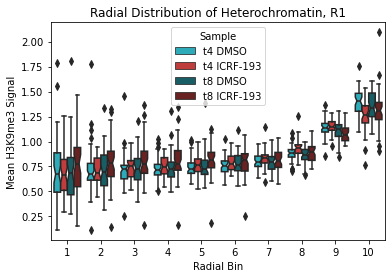

In [64]:
#Plot radial distribution using seaborn
cmap = sns.color_palette(['#17BECF','#D62728','#0D6871','#751616'])
sns.boxplot(data = combo_greenMeanFrac[combo_greenMeanFrac['Replicate'] == 'R1'], x = 'Radial Bin', y = 'value', 
            hue = 'Sample', palette = cmap, notch = True,
            hue_order = ['t4 DMSO', 't4 ICRF-193', 't8 DMSO', 't8 ICRF-193'])
plt.ylabel('Mean H3K9me3 Signal')
plt.title('Radial Distribution of Heterochromatin, R1')
plt.savefig('220221_HetRadialDist_R1.png', dpi = 300)

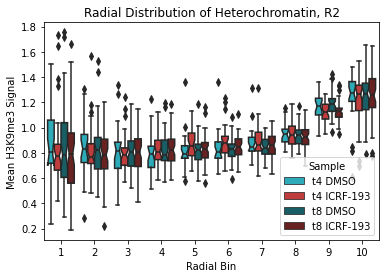

In [65]:
#Plot radial distribution using seaborn
cmap = sns.color_palette(['#17BECF','#D62728','#0D6871','#751616'])
sns.boxplot(data = combo_greenMeanFrac[combo_greenMeanFrac['Replicate'] == 'R2'], x = 'Radial Bin', y = 'value', 
            hue = 'Sample', palette = cmap, notch = True,
            hue_order = ['t4 DMSO', 't4 ICRF-193', 't8 DMSO', 't8 ICRF-193'])
plt.ylabel('Mean H3K9me3 Signal')
plt.title('Radial Distribution of Heterochromatin, R2')
plt.savefig('220221_HetRadialDist_R2.png', dpi = 300)

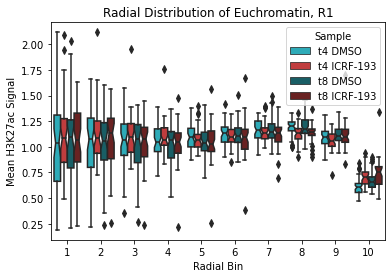

In [66]:
#Plot radial distribution using seaborn
cmap = sns.color_palette(['#17BECF','#D62728','#0D6871','#751616'])
sns.boxplot(data = combo_redMeanFrac[combo_greenMeanFrac['Replicate'] == 'R1'], x = 'Radial Bin', y = 'value', 
            hue = 'Sample', palette = cmap, notch = True,
            hue_order = ['t4 DMSO', 't4 ICRF-193', 't8 DMSO', 't8 ICRF-193'])
plt.ylabel('Mean H3K27ac Signal')
plt.title('Radial Distribution of Euchromatin, R1')
plt.savefig('220221_EuRadialDist_R1.png', dpi = 300)

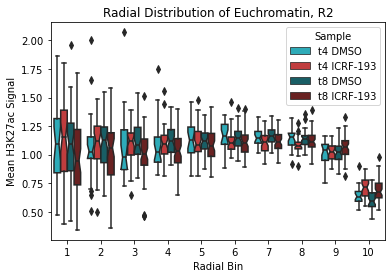

In [67]:
#Plot radial distribution using seaborn
cmap = sns.color_palette(['#17BECF','#D62728','#0D6871','#751616'])
sns.boxplot(data = combo_redMeanFrac[combo_greenMeanFrac['Replicate'] == 'R2'], x = 'Radial Bin', y = 'value', 
            hue = 'Sample', palette = cmap, notch = True,
            hue_order = ['t4 DMSO', 't4 ICRF-193', 't8 DMSO', 't8 ICRF-193'])
plt.ylabel('Mean H3K27ac Signal')
plt.title('Radial Distribution of Euchromatin, R2')
plt.savefig('220221_EuRadialDist_R2.png', dpi = 300)

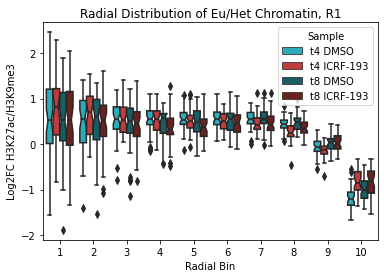

In [68]:
#Plot radial distribution using seaborn
cmap = sns.color_palette(['#17BECF','#D62728','#0D6871','#751616'])
sns.boxplot(data = combo_redMeanFrac[combo_redMeanFrac['Replicate'] == 'R1'], x = 'Radial Bin', 
                                     y = 'log2FC Red/Green', 
            hue = 'Sample', palette = cmap, notch = True,
            hue_order = ['t4 DMSO', 't4 ICRF-193', 't8 DMSO', 't8 ICRF-193'])
plt.ylabel('Log2FC H3K27ac/H3K9me3')
plt.title('Radial Distribution of Eu/Het Chromatin, R1')
plt.savefig('220221_EuvsHetRadialDist_R1.png', dpi = 300)

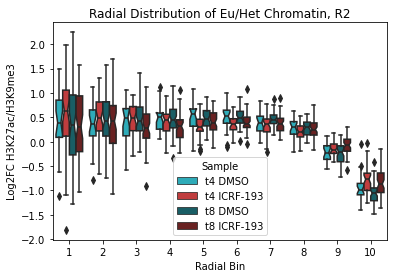

In [69]:
#Plot radial distribution using seaborn
cmap = sns.color_palette(['#17BECF','#D62728','#0D6871','#751616'])
sns.boxplot(data = combo_redMeanFrac[combo_redMeanFrac['Replicate'] == 'R2'], x = 'Radial Bin', 
                                     y = 'log2FC Red/Green', 
            hue = 'Sample', palette = cmap, notch = True,
            hue_order = ['t4 DMSO', 't4 ICRF-193', 't8 DMSO', 't8 ICRF-193'])
plt.ylabel('Log2FC H3K27ac/H3K9me3')
plt.title('Radial Distribution of Eu/Het Chromatin, R2')
plt.savefig('220221_EuvsHetRadialDist_R2.png', dpi = 300)